In [2]:
# Author: Brandon Botzer
# Date: 2/21/2024
# Class: Penn State - AI 879

Problem:  
Build your own face recognition classification model, using the following steps:

1) face_pos.mat file was build using images of two classes, one containing faces (positive) and another not containing them (negative), see the zip file data.zipDownload data.zip
2) Build a cascade detection model and test it on two new images: nature_image.jpg and face_test.jpg
3) VOID: Build a ACF detection model and test it on the two new images: (same as above two)
    Unfortunately, there is no library implement ACF detector except MATLAB source codeLinks to an external site., skip this task if you use python.

Compare the results of two models and discuss.

In [3]:
# Imports for functions

from PIL import Image

import skimage as ski
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import cv2 as cv


# Showing the results of scipy computations
import pandas as pd

cv.__version__, ski.__version__

('4.8.1', '0.22.0')

In [4]:
# I will at first attempt to do this with a pre-trained file from skimage
pretrained_file = ski.data.lbp_frontal_face_cascade_filename()

In [5]:
# Create the Cascade detector object
cascade_detector = ski.feature.Cascade(pretrained_file)

In [6]:
# Load in the image with and without faces
pos_im = ski.io.imread('face_test.jpg')
pos_im_cv = cv.imread('face_test.jpg')
neg_im = ski.io.imread('nature_image.jpg')
neg_im_cv = cv.imread('nature_image.jpg')

In [7]:
# I had to tinker with the min_size and the max_size of the search window for a bit to find the faces

# Use the cascade detector to locate faces
face_detected = cascade_detector.detect_multi_scale(img=pos_im,
                                                    scale_factor=1.2,
                                                    step_ratio=1,
                                                    min_size=(20,20),
                                                    max_size=(200, 200))

'''
face_detected is in the form of:

list of dicts
Dict have form
{‘r’: int,
‘c’: int,
‘width’: int,
‘height’: int},
where ‘r’ represents row position of top left corner of detected window,
‘c’ - col position,
‘width’ - width of detected window,
‘height’ - height of detected window.
'''

'\nface_detected is in the form of:\n\nlist of dicts\nDict have form\n{‘r’: int,\n‘c’: int,\n‘width’: int,\n‘height’: int},\nwhere ‘r’ represents row position of top left corner of detected window,\n‘c’ - col position,\n‘width’ - width of detected window,\n‘height’ - height of detected window.\n'

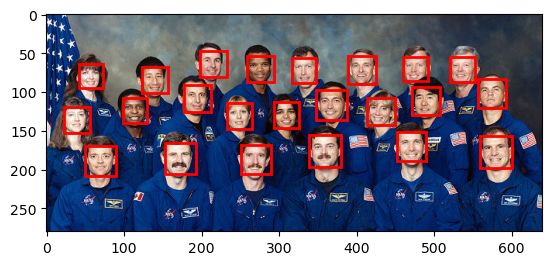

In [8]:
# Outputing the image with face mappings as done in:
# https://scikit-image.org/docs/stable/auto_examples/applications/plot_face_detection.html#sphx-glr-auto-examples-applications-plot-face-detection-py

# Show the positive image
plt.imshow(pos_im)

# Get the current axis
img_desc = plt.gca()
# Set the color mapping to gray
plt.set_cmap('gray')

# For each of the faces detected, make a red rectangle path
#   The patch that is pulled each time is in the form of a dict from above.
#   This is how the patch values 'c', 'r', etc. are used below
for patch in face_detected:

    # Add the patch to the image
    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

# Show me everything
plt.show()

In [17]:
# I had to tinker with the min_size and the max_size of the search window for a bit to find the faces

# Use the cascade detector to locate faces
face_detected_nature = cascade_detector.detect_multi_scale(img=neg_im,
                                                    scale_factor=1.2,
                                                    step_ratio=1,
                                                    min_size=(20,20),
                                                    max_size=(200, 200))

'''
face_detected is in the form of:

list of dicts
Dict have form
{‘r’: int,
‘c’: int,
‘width’: int,
‘height’: int},
where ‘r’ represents row position of top left corner of detected window,
‘c’ - col position,
‘width’ - width of detected window,
‘height’ - height of detected window.
'''

'\nface_detected is in the form of:\n\nlist of dicts\nDict have form\n{‘r’: int,\n‘c’: int,\n‘width’: int,\n‘height’: int},\nwhere ‘r’ represents row position of top left corner of detected window,\n‘c’ - col position,\n‘width’ - width of detected window,\n‘height’ - height of detected window.\n'

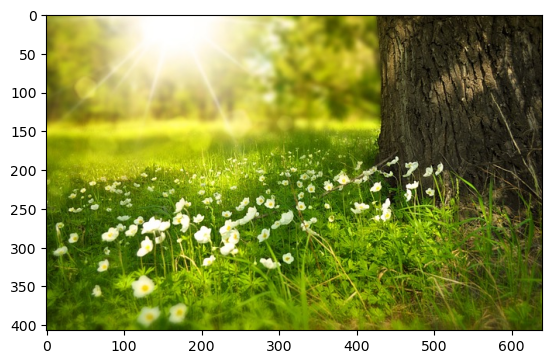

In [19]:
# Outputing the image with face mappings as done in:
# https://scikit-image.org/docs/stable/auto_examples/applications/plot_face_detection.html#sphx-glr-auto-examples-applications-plot-face-detection-py

# Show the positive image
plt.imshow(neg_im)

# Get the current axis
img_desc = plt.gca()
# Set the color mapping to gray
plt.set_cmap('gray')

# For each of the faces detected, make a red rectangle path
#   The patch that is pulled each time is in the form of a dict from above.
#   This is how the patch values 'c', 'r', etc. are used below
for patch in face_detected_nature:

    # Add the patch to the image
    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

# Show me everything
plt.show()

From the pre-trained model from skimage, no faces were found in the negative nature image.

This time I have created an XML training file using Matlab using the Local Binary Patterns FeatureType setting.

This had to be done in Matlab prior to this code.  The XML file claims to be compatable with OpenCV 4.5.2.  Hopefully it will also work with OpenCV 4.8.1 as well as skimage 0.22.0.  We shall see...

In [9]:
# I had to switch the FeatureType to Local Binary Pattern.
# Using HAAR results in a kernal crash.
# HOG is not found and causes exceptions to be thrown by the openCV classifier and invalid literals for integers for skimage.
trained_file2 = 'FaceModel_LBP.xml'
# Create the Cascade detector object
cascade_detector2_cv = cv.CascadeClassifier(trained_file2)
cascade_detector2_ski = ski.feature.Cascade(trained_file2)

I run a cascade detector out of both OpenCV as well as skimage to see if one performs better with the XML training file.

## OpenCV

In [10]:
# I had to tinker with the min_size and the max_size of the search window for a bit to find the faces

#OPENCV
face_detected2_cv = cascade_detector2_cv.detectMultiScale(image=pos_im_cv,
                                                          scaleFactor=1.2,
                                                    minSize=(20,20),
                                                    maxSize=(200, 200))


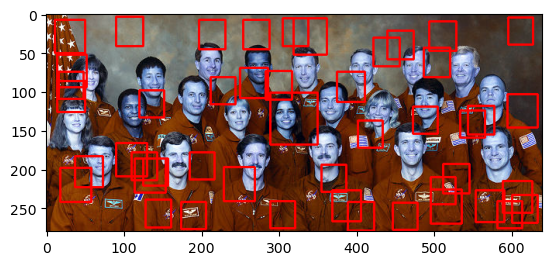

In [11]:
# Outputing the image with face mappings as done in:
# https://scikit-image.org/docs/stable/auto_examples/applications/plot_face_detection.html#sphx-glr-auto-examples-applications-plot-face-detection-py

# For each of the faces detected, make a red rectangle path
#   The patch that is pulled each time is in the form of a dict from above.
#   This is how the patch values 'c', 'r', etc. are used below
for (x, y, width, height) in face_detected2_cv:

    # Add the patch to the image
    cv.rectangle(pos_im_cv, (x,y), (x+width, y+height), (255,0,0),2)

# Show me everything
plt.imshow(pos_im_cv)

In [12]:
# I had to tinker with the min_size and the max_size of the search window for a bit to find the faces

#OPENCV
face_detected2_cv_nature = cascade_detector2_cv.detectMultiScale(image=neg_im_cv,
                                                          scaleFactor=1.2,
                                                    minSize=(20,20),
                                                    maxSize=(200, 200))

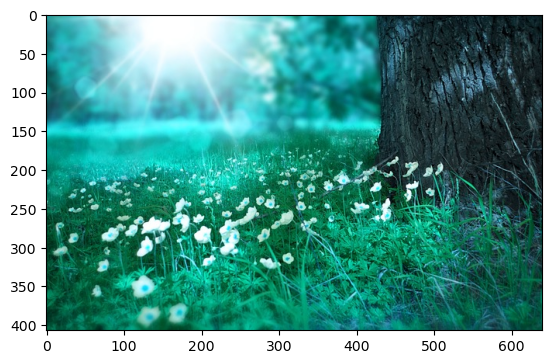

In [13]:
# Outputing the image with face mappings as done in:
# https://scikit-image.org/docs/stable/auto_examples/applications/plot_face_detection.html#sphx-glr-auto-examples-applications-plot-face-detection-py

# For each of the faces detected, make a red rectangle path
#   The patch that is pulled each time is in the form of a dict from above.
#   This is how the patch values 'c', 'r', etc. are used below
for (x, y, width, height) in face_detected2_cv_nature:

    # Add the patch to the image
    cv.rectangle(pos_im_cv, (x,y), (x+width, y+height), (255,0,0),2)

# Show me everything
plt.imshow(neg_im_cv)

No faces were found in the nature image.

## Skimage

In [25]:
# # #SKIMAGE
face_detected2_ski = cascade_detector2_ski.detect_multi_scale(img=pos_im_cv,
                                                    scale_factor=1.2,
                                                    step_ratio=1,
                                                    min_size=(20,20),
                                                    max_size=(200, 200))

'''
face_detected is in the form of:

list of dicts
Dict have form
{‘r’: int,
‘c’: int,
‘width’: int,
‘height’: int},
where ‘r’ represents row position of top left corner of detected window,
‘c’ - col position,
‘width’ - width of detected window,
‘height’ - height of detected window.'''

'\nface_detected is in the form of:\n\nlist of dicts\nDict have form\n{‘r’: int,\n‘c’: int,\n‘width’: int,\n‘height’: int},\nwhere ‘r’ represents row position of top left corner of detected window,\n‘c’ - col position,\n‘width’ - width of detected window,\n‘height’ - height of detected window.'

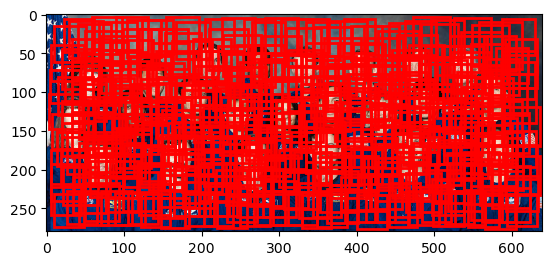

In [26]:
# Outputing the image with face mappings as done in:
# https://scikit-image.org/docs/stable/auto_examples/applications/plot_face_detection.html#sphx-glr-auto-examples-applications-plot-face-detection-py

# Show the positive image
plt.imshow(pos_im)

# Get the current axis
img_desc = plt.gca()
# Set the color mapping to gray
plt.set_cmap('gray')

# For each of the faces detected, make a red rectangle path
#   The patch that is pulled each time is in the form of a dict from above.
#   This is how the patch values 'c', 'r', etc. are used below
for patch in face_detected2_ski:

    # Add the patch to the image
    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

# Show me everything
plt.show()

In [14]:
# # #SKIMAGE
face_detected2_ski_nature = cascade_detector2_ski.detect_multi_scale(img=neg_im_cv,
                                                    scale_factor=1.2,
                                                    step_ratio=1,
                                                    min_size=(20,20),
                                                    max_size=(200, 200))

'''
face_detected is in the form of:

list of dicts
Dict have form
{‘r’: int,
‘c’: int,
‘width’: int,
‘height’: int},
where ‘r’ represents row position of top left corner of detected window,
‘c’ - col position,
‘width’ - width of detected window,
‘height’ - height of detected window.'''

'\nface_detected is in the form of:\n\nlist of dicts\nDict have form\n{‘r’: int,\n‘c’: int,\n‘width’: int,\n‘height’: int},\nwhere ‘r’ represents row position of top left corner of detected window,\n‘c’ - col position,\n‘width’ - width of detected window,\n‘height’ - height of detected window.'

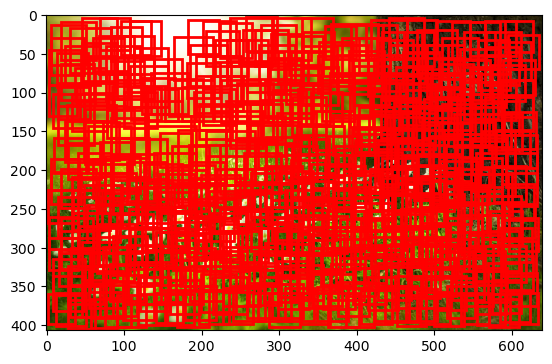

In [15]:
# Outputing the image with face mappings as done in:
# https://scikit-image.org/docs/stable/auto_examples/applications/plot_face_detection.html#sphx-glr-auto-examples-applications-plot-face-detection-py

# Show the positive image
plt.imshow(neg_im)

# Get the current axis
img_desc = plt.gca()
# Set the color mapping to gray
plt.set_cmap('gray')

# For each of the faces detected, make a red rectangle path
#   The patch that is pulled each time is in the form of a dict from above.
#   This is how the patch values 'c', 'r', etc. are used below
for patch in face_detected2_ski_nature:

    # Add the patch to the image
    img_desc.add_patch(
        patches.Rectangle(
            (patch['c'], patch['r']),
            patch['width'],
            patch['height'],
            fill=False,
            color='r',
            linewidth=2
        )
    )

# Show me everything
plt.show()

The cascade detector for skimage is clearly not working well given the multitude of 'faces' it found in the positive image, and the stupendous amount of false positives it found in the negative image.  This probably has to do with the XML file from Matlab being designed with OpenCV in mind.

Looking at the comparisions between OpenCV and skimage, the OpenCV cascade did a much better job with the training file provided from Matlab.  The methods to train a XML file nativly using OpenCV have broken in the most recent releases.  Skimage bases its training off of OpenCV items which would have hopefully allowed for the XML file to be used by skimage.  Clerarly this was not the case.  Matlab's output XML file is designed to be used with OpenCV 4.5.2 but seems to also hold with OpenCV version 4.8.1.  This probably is why the OpenCV cascade provided better results.